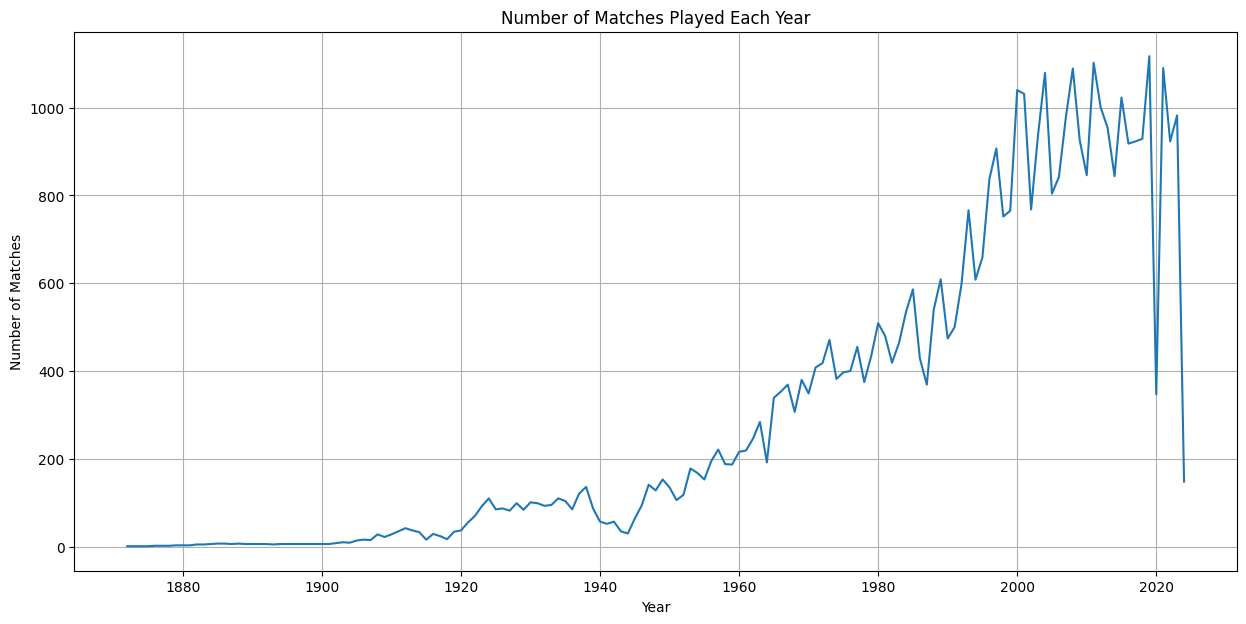

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'results.csv'
data = pd.read_csv(file_path)


data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year


matches_per_year = data['year'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values)
plt.title('Number of Matches Played Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


C:\Users\paulh\AppData\Local\Temp\ipykernel_21528\1680587643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_hosted.values, y=top_10_hosted.index, palette="Blues_d")
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When gro

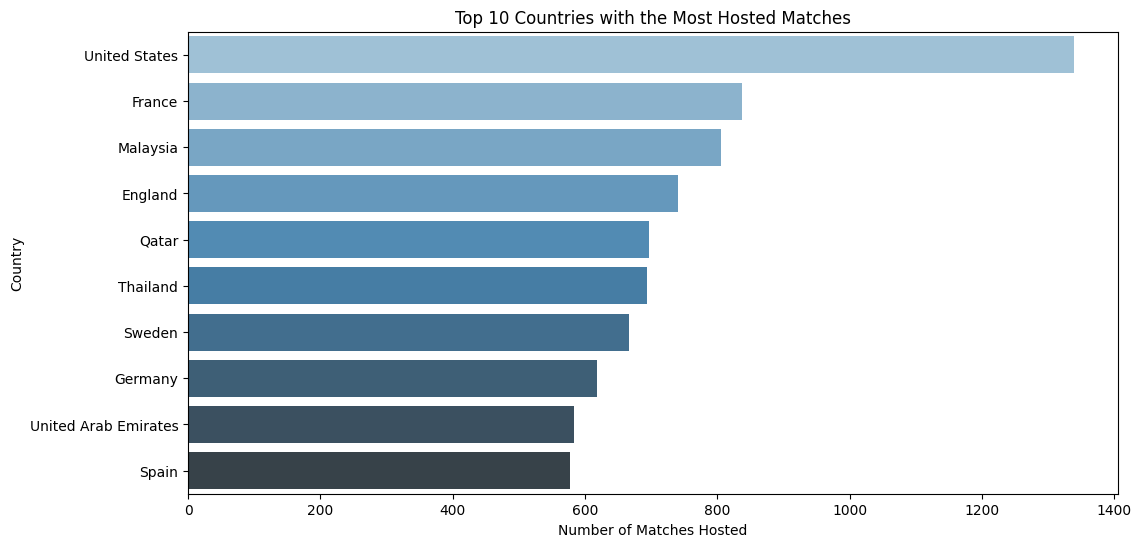

In [3]:
hosted_matches = data['country'].value_counts()

top_10_hosted = hosted_matches.head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_hosted.values, y=top_10_hosted.index, palette="Blues_d")
plt.title('Top 10 Countries with the Most Hosted Matches')
plt.xlabel('Number of Matches Hosted')
plt.ylabel('Country')
plt.show()

C:\Users\paulh\AppData\Local\Temp\ipykernel_21528\1049915443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores.index, y=top_scores.values, palette="mako")
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

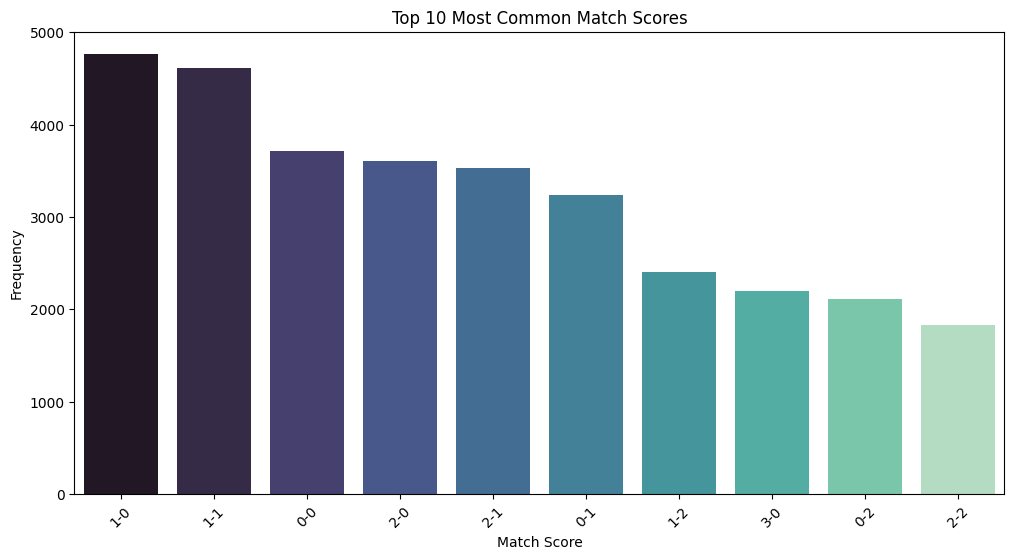

In [4]:
# Creating a new column for match score
data['match_score'] = data['home_score'].astype(str) + '-' + data['away_score'].astype(str)

# Getting the top 10 most common match scores
top_scores = data['match_score'].value_counts().head(10)

# Plotting the most common match scores
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores.index, y=top_scores.values, palette="mako")
plt.title('Top 10 Most Common Match Scores')
plt.xlabel('Match Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

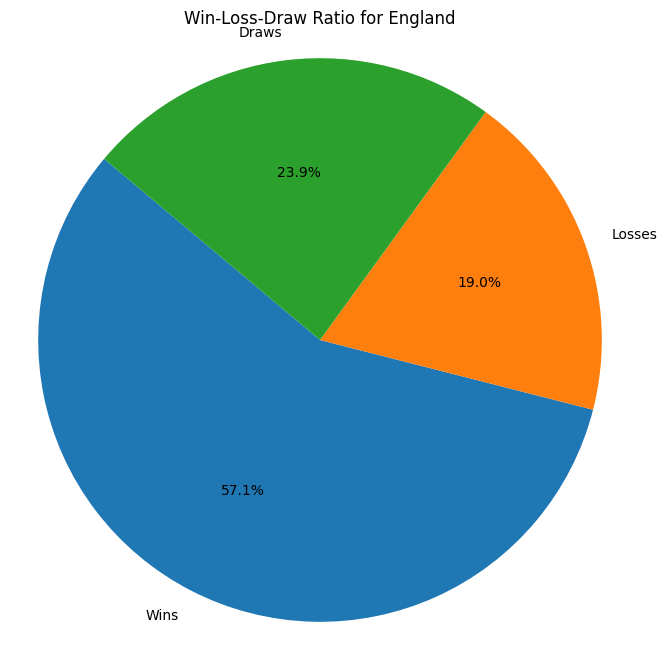

In [5]:
team = 'England'

# Identifying wins, losses, and draws for the selected team
wins = data[(data['home_team'] == team) & (data['home_score'] > data['away_score'])].shape[0] + \
       data[(data['away_team'] == team) & (data['away_score'] > data['home_score'])].shape[0]

losses = data[(data['home_team'] == team) & (data['home_score'] < data['away_score'])].shape[0] + \
         data[(data['away_team'] == team) & (data['away_score'] < data['home_score'])].shape[0]

draws = data[(data['home_team'] == team) & (data['home_score'] == data['away_score'])].shape[0] + \
        data[(data['away_team'] == team) & (data['away_score'] == data['home_score'])].shape[0]

# Data for plotting
labels = 'Wins', 'Losses', 'Draws'
sizes = [wins, losses, draws]

# Plotting the win-loss-draw ratio in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title(f'Win-Loss-Draw Ratio for {team}')
plt.show()

C:\Users\paulh\AppData\Local\Temp\ipykernel_21528\427963910.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tournaments.values, y=top_tournaments.index, palette="cubehelix")
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: Whe

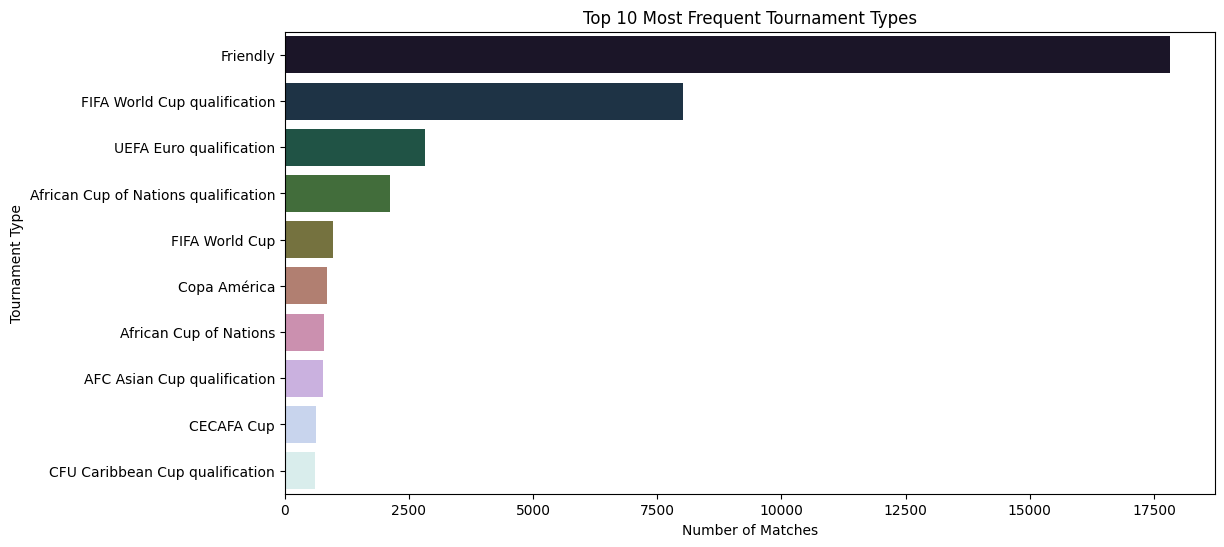

In [6]:
# Counting the number of matches by tournament type
tournament_counts = data['tournament'].value_counts()

# Selecting the top 10 most frequent tournaments for a clearer visualization
top_tournaments = tournament_counts.head(10)

# Plotting the frequency of different tournament types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tournaments.values, y=top_tournaments.index, palette="cubehelix")
plt.title('Top 10 Most Frequent Tournament Types')
plt.xlabel('Number of Matches')
plt.ylabel('Tournament Type')
plt.show()

C:\Users\paulh\AppData\Local\Temp\ipykernel_21528\1705218721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="pastel")
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


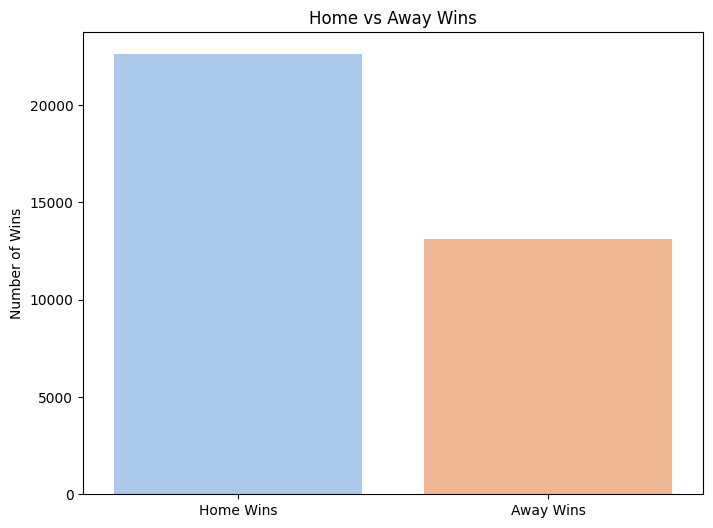

In [7]:
home_wins = data[data['home_score'] > data['away_score']].shape[0]
away_wins = data[data['home_score'] < data['away_score']].shape[0]

# Data for plotting
categories = ['Home Wins', 'Away Wins']
values = [home_wins, away_wins]

# Plotting the comparison of home wins vs away wins
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette="pastel")
plt.title('Home vs Away Wins')
plt.ylabel('Number of Wins')
plt.show()